# Introduction to Sci-Kit Learn and Clustering

In this tutorial we will introduce the Sci-Kit Learn library:https://scikit-learn.org/stable/

This is a very important library with a huge toolkit for data processing, unsupervised and supervised learning. It is one of the core tools for data science.

We will see some of the capabilities of this toolkit and focus on clustering.

In [37]:
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

%matplotlib inline

## Computing distances

For the computation of distances there are libraries in Scipy

http://docs.scipy.org/doc/scipy-0.15.1/reference/spatial.distance.html#module-scipy.spatial.distance

but also in SciKit metrics library:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html

Most of these work with sparse data as well.


### Compute distances using scipy

Computing distances between vectors

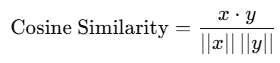

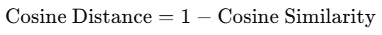

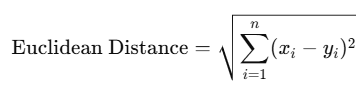

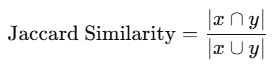

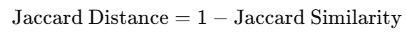

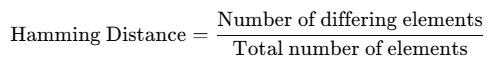

In [38]:
import scipy.spatial.distance as sp_dist

x = np.random.randint(2, size = 5)
y = np.random.randint(2, size = 5)
print (x)
print (y)
print (sp_dist.cosine(x,y))
print (sp_dist.euclidean(x,y))
print (sp_dist.jaccard(x,y))
print (sp_dist.hamming(x,y))
# When computing jaccard similarity of 0/1 matrices,
# 1 means that the element corresponding to the column is in the set,
# 0 that the element is not in the set

[0 1 0 1 1]
[1 1 0 1 1]
0.1339745962155613
1.0
0.25
0.2


Compute pairwise distances in a table using **pdist** of scipy.

When given a matrix, it computes all pairwise distances between its rows. The output is a vector with N(N-1)/2 entries (N number of rows). We can transform it into an NxN distance matrix using **squareform**.

In [39]:
A = np.random.randint(2, size = (5,3))

# computes the matrix of all pairwise distances of rows
# returns a vector with N(N-1)/2 entries (N number of rows)
D = sp_dist.pdist(A, 'jaccard')
print (A)
print('\n All row distances')
print (D)
print('\n All row distances in Symmetric Matrix form')
print(sp_dist.squareform(D))

[[0 1 0]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 0 1]]

 All row distances
[1.  1.  1.  1.  1.  0.5 0.  1.  1.  0.5]

 All row distances in Symmetric Matrix form
[[0.  1.  1.  1.  1. ]
 [1.  0.  1.  0.5 0. ]
 [1.  1.  0.  1.  1. ]
 [1.  0.5 1.  0.  0.5]
 [1.  0.  1.  0.5 0. ]]


In [40]:
x = x.reshape(1,5)
y = y.reshape(1,5)
sp_dist.cdist(x,y,'cosine')

array([[0.1339746]])

We can compute all pairwise distances between the rows of two tables A and B, using the **cdist** function of scipy. If A has N rows and B has M rows the result is an NxM matrix with all the distances

In [41]:
B = np.random.randint(2, size = (3,3))
print(A)
print('\n')
print(B)
D = sp_dist.cdist(A,B,'jaccard')
print('\n')
print(D)

[[0 1 0]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 0 1]]


[[1 1 1]
 [1 1 0]
 [1 1 0]]


[[0.66666667 0.5        0.5       ]
 [0.66666667 1.         1.        ]
 [1.         1.         1.        ]
 [0.33333333 0.66666667 0.66666667]
 [0.66666667 1.         1.        ]]


### Compute distances using sklearn

In [42]:
import sklearn.metrics as metrics

#computes the matrix of all pairwise distances of rows
# returns a NxN matrix (N number of rows)
print(A)
D2 = metrics.pairwise_distances(A,metric = 'jaccard')
print('\n The matrix of row distances')
print(D2)

[[0 1 0]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 0 1]]

 The matrix of row distances
[[0.  1.  1.  1.  1. ]
 [1.  0.  1.  0.5 0. ]
 [1.  1.  0.  1.  1. ]
 [1.  0.5 1.  0.  0.5]
 [1.  0.  1.  0.5 0. ]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Some similarity and distance metrics are directly computed in the pairwise library:
    
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

In [43]:
C = metrics.pairwise.cosine_similarity(A)
print('Cosine Similarity')
print(C)

Cosine Similarity
[[1.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.70710678 1.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.70710678 0.         1.         0.70710678]
 [0.         1.         0.         0.70710678 1.        ]]


Compute distances between the rows of two tables

In [44]:
print(A)
print('\n')
print(B)

#computes the matrix of all pairwise distances of rows of A with rows of B
# returns an NxM matrix (N rows of A, M rows of B)
D3 = metrics.pairwise_distances(A,B,metric = 'jaccard')
print('\n The matrix of distances between the rows of A and B')
print(D3)

[[0 1 0]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 0 1]]


[[1 1 1]
 [1 1 0]
 [1 1 0]]

 The matrix of distances between the rows of A and B
[[0.66666667 0.5        0.5       ]
 [0.66666667 1.         1.        ]
 [1.         1.         1.        ]
 [0.33333333 0.66666667 0.66666667]
 [0.66666667 1.         1.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


We can apply everything to sparce matrices

In [45]:
d = np.array([[0, 0, 12],
              [0, 1, 1],
              [0, 5, 34],
              [1, 3, 12],
              [1, 2, 6],
              [2, 0, 23],
              [3, 4, 14],
              ])
s = sp_sparse.csr_matrix((d[:,2],(d[:,0],d[:,1])), shape=(4,6))
D4 = metrics.pairwise.pairwise_distances(s,metric = 'euclidean')
print('Sparce Matrix')
print(s.toarray())
print('\n Matrix of row distances')
print(D4)

Sparce Matrix
[[12  1  0  0  0 34]
 [ 0  0  6 12  0  0]
 [23  0  0  0  0  0]
 [ 0  0  0  0 14  0]]

 Matrix of row distances
[[ 0.         38.48376281 35.74912586 38.69108424]
 [38.48376281  0.         26.62705391 19.39071943]
 [35.74912586 26.62705391  0.         26.92582404]
 [38.69108424 19.39071943 26.92582404  0.        ]]


In [46]:
v = np.random.randint(2, size = 6)
v = v.reshape(1,6)
print(v)
print('\n')
print(s.toarray())
print('\n Matrix of row distances')
metrics.pairwise.pairwise_distances(v,s,metric = 'euclidean')

[[1 1 1 0 0 0]]


[[12  1  0  0  0 34]
 [ 0  0  6 12  0  0]
 [23  0  0  0  0  0]
 [ 0  0  0  0 14  0]]

 Matrix of row distances


array([[35.74912586, 13.07669683, 22.04540769, 14.10673598]])

## Clustering

You can read more about clustering in SciKit here:

http://scikit-learn.org/stable/modules/clustering.html

Generate data from Gaussian distributions.

More on data generation here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

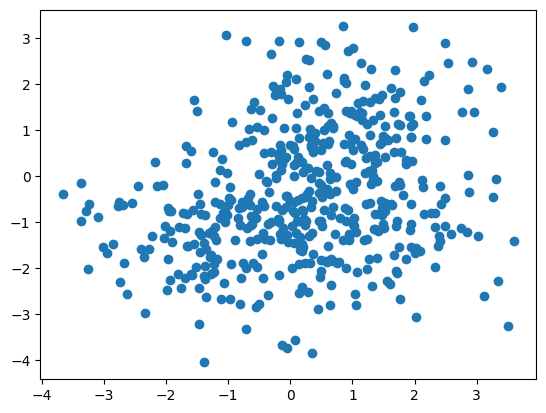

In [47]:
centers = [[1,1], [-1, -1], [1, -1]]
X, true_labels = sk_data.make_blobs(n_samples=500, centers=centers, n_features=2,
                                    center_box=(-10.0, 10.0),random_state=0)
plt.scatter(X[:,0], X[:,1])

In [48]:
print(type(X))
print(true_labels)
print(len(true_labels[true_labels==0]),len(true_labels[true_labels==1]),len(true_labels[true_labels==2]))

<class 'numpy.ndarray'>
[2 0 1 1 0 1 1 2 2 2 1 0 0 1 1 0 0 2 2 0 0 0 2 2 0 1 0 2 0 2 0 0 0 2 1 1 0
 0 2 2 0 2 1 0 2 2 0 0 1 2 2 0 0 1 0 2 1 1 1 2 2 1 0 0 2 1 1 2 2 2 2 1 2 0
 0 0 2 2 0 0 0 0 0 2 1 2 2 0 0 2 2 1 0 2 1 0 1 2 1 1 2 2 1 2 1 0 1 1 0 2 2
 2 0 2 0 2 2 0 1 1 0 1 2 1 1 2 2 1 2 0 0 0 1 2 2 0 2 0 2 1 2 1 0 0 1 0 2 1
 0 1 2 2 2 0 1 0 1 0 2 2 0 1 0 0 1 2 1 1 1 2 1 2 1 0 1 0 2 2 0 2 1 0 2 2 0
 1 2 0 0 2 1 2 2 2 0 2 2 1 2 1 0 2 1 2 1 2 0 0 0 1 2 0 0 2 1 1 2 2 0 1 2 0
 0 1 1 1 0 2 2 2 1 2 1 1 1 0 1 2 0 2 1 2 0 2 1 1 2 2 1 2 0 0 1 0 1 0 2 1 2
 1 1 1 1 0 0 1 0 1 1 1 1 2 1 0 0 0 0 2 1 2 2 0 0 1 0 2 1 0 2 2 1 0 0 1 0 2
 1 2 1 0 0 0 1 2 0 0 2 2 1 0 0 1 1 0 2 1 0 1 2 1 1 0 2 0 2 1 2 1 0 0 0 1 0
 2 2 1 0 2 2 2 0 1 1 1 0 1 0 0 0 2 0 2 0 2 2 0 2 2 2 2 1 1 1 2 2 2 2 0 0 0
 1 2 0 1 0 1 0 1 2 2 0 2 1 0 1 2 2 0 1 2 1 2 0 0 0 1 2 0 0 1 2 2 0 2 1 0 2
 0 1 0 2 0 0 1 0 0 0 0 1 0 2 2 2 1 0 1 2 1 2 1 0 1 1 1 1 1 0 2 1 2 0 0 1 2
 0 2 1 0 0 1 1 2 1 2 1 1 1 1 2 0 1 1 0 1 2 0 1 1 0 2 0 0 1 1 1 0 1 0 1 1 1
 

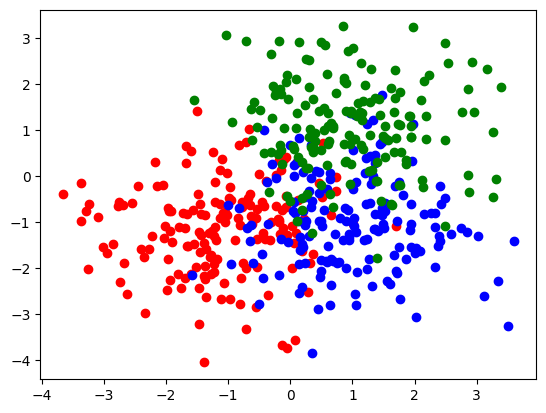

In [49]:
plt.scatter(X[true_labels==1,0], X[true_labels==1,1],c = 'r')
plt.scatter(X[true_labels==2,0], X[true_labels==2,1],c = 'b')
plt.scatter(X[true_labels==0,0], X[true_labels==0,1],c = 'g')

Useful command: We will create a colormap of the distance matrix using the [<tt>pcolormesh</tt>](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) method of matplotlib.pyplot

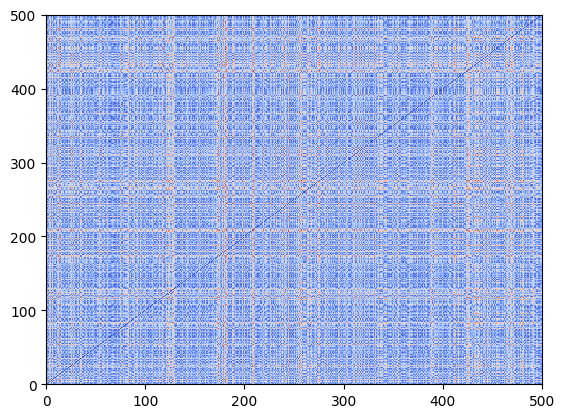

In [50]:
euclidean_dists = metrics.euclidean_distances(X)
plt.pcolormesh(euclidean_dists,cmap=plt.cm.coolwarm)

## Clustering Algorithms

scikit-learn has a huge set of tools for unsupervised learning generally, and clustering specifically.
These are in sklearn.cluster. http://scikit-learn.org/stable/modules/clustering.html

There are 3 functions in all the clustering classes,
<ul>
<li> fit(): builds the model from the training data (e.g. for kmeans, it finds the centroids)
<li> predict(): assigns labels to the data after building the model
<li> fit_predict(): does both at the same data (e.g in kmeans, it finds the centroids and assigns the labels to the dataset)
</ul>

### K-means clustering ###

More on the k-means clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Important parameters

<tt>init</tt>: determines the way the initialization is done. kmeans++ is the default.

<tt>n_init</tt>: number of random initializations

<tt>max_iter</tt>: maximum number of iterations,

Important attributes:

<tt>labels_</tt> the labels for each point

<tt>cluster_centers_</tt>: the cluster centroids

<tt>inertia_</tt>: the SSE value

In [51]:
import sklearn.cluster as sk_cluster

kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, max_iter=100)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  729.3882206069683

Cluster labels
[2 2 2 0 1 0 0 2 2 2 0 1 1 0 0 1 1 1 0 2 1 1 2 1 1 0 1 0 1 2 2 1 1 2 0 0 1
 1 2 2 1 2 0 1 2 2 1 1 2 2 0 1 1 0 1 1 0 0 1 1 2 0 1 1 1 0 0 0 2 2 1 0 2 1
 2 1 0 2 1 1 1 1 1 2 0 2 1 1 1 2 0 0 1 2 2 2 0 2 1 0 1 2 2 2 0 1 0 0 1 2 2
 2 1 2 2 2 2 1 0 0 1 0 2 0 0 2 2 0 2 1 1 1 0 2 2 1 2 1 2 2 2 0 2 2 0 1 2 2
 1 0 1 2 2 1 0 1 0 2 1 2 1 2 2 1 0 2 0 0 0 2 2 2 0 1 0 1 0 2 1 2 0 1 1 2 1
 0 2 1 1 1 0 2 2 2 1 2 2 0 2 0 1 2 0 2 0 2 1 1 1 0 2 1 1 0 1 0 2 2 1 0 2 1
 1 0 0 1 1 2 1 2 0 2 0 1 0 1 0 1 1 1 0 2 1 2 0 2 2 1 0 2 1 2 0 1 0 1 2 0 2
 0 0 0 2 1 1 1 1 0 0 1 0 2 0 1 1 1 1 2 0 2 2 1 1 0 1 2 0 1 0 2 0 2 1 0 1 1
 0 2 0 1 1 1 0 2 1 1 1 2 0 2 1 0 0 1 2 0 1 0 1 2 0 1 2 1 2 0 1 2 1 1 1 0 1
 1 2 0 2 2 2 2 1 0 0 0 2 1 1 1 1 2 1 0 2 2 0 1 1 2 0 0 0 2 0 1 2 2 2 1 1 1
 2 1 1 0 1 0 2 1 0 2 1 2 0 1 0 2 2 1 0 2 0 2 1 2 1 0 2 1 1 0 2 2 1 2 0 1 2
 2 0 0 1 1 1 0 1 1 1 1 2 1 1 2 2 0 1 2 2 2 2 0 1 0 0 2 0 0 1 0 0 2 1 1 0 2
 1 2 0 1 2 2 0 2 0 2 0 0 0 

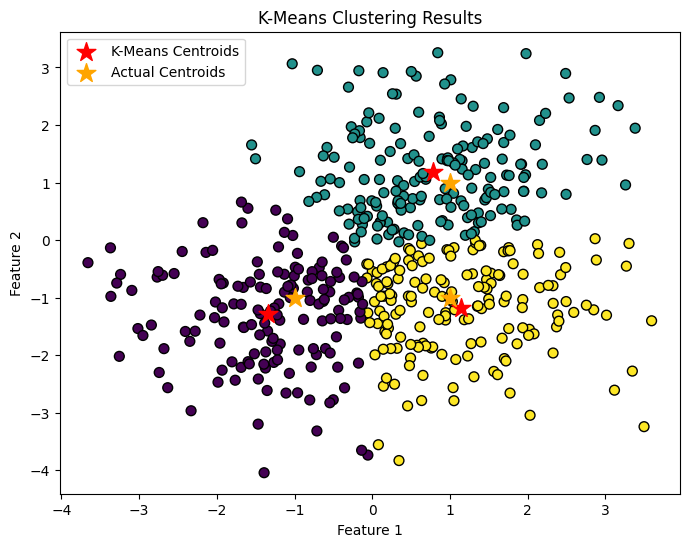

In [52]:
actual_centroids = np.array([[1, 1], [-1, -1], [1, -1]])
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50, edgecolor='k')
# Plot centroids as red stars
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='K-Means Centroids')
# Plot also the actual centroids as orange stars
plt.scatter(actual_centroids[:, 0], actual_centroids[:, 1], c='orange', marker='*', s=200, label='Actual Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Useful command: <tt>numpy.argsort</tt> sorts a set of values and returns the sorted indices

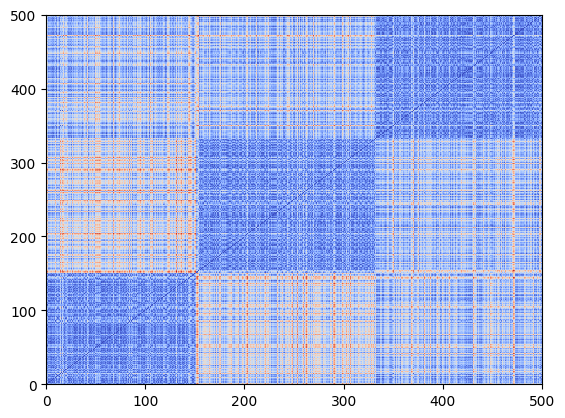

In [53]:
idx = np.argsort(kmeans_labels) # returns the indices in sorted order
rX = X[idx,:]
r_euclid = metrics.euclidean_distances(rX)
#r_euclid = euclidean_dists[idx,:][:,idx]
plt.pcolormesh(r_euclid,cmap=plt.cm.coolwarm)

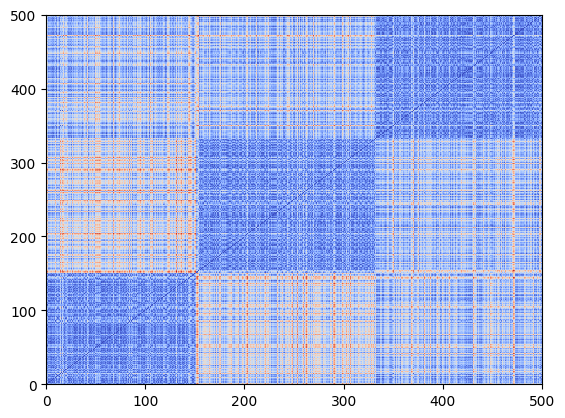

In [54]:
se = euclidean_dists[idx,:]
se = se[:,idx]
plt.pcolormesh(se,cmap=plt.cm.coolwarm)

## Evaluation

### Confusion matrix ###

Confusion matrix: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

[[  1 135  15]
 [140  12  29]
 [ 26  20 122]]


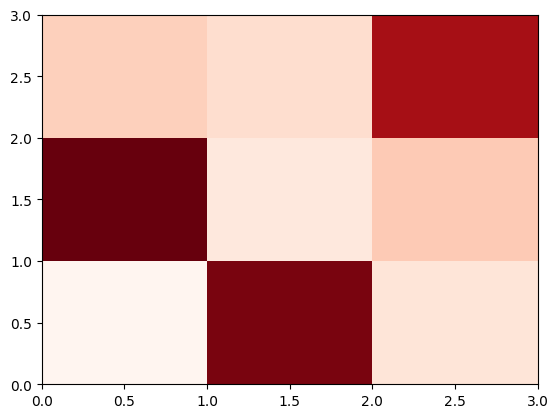

In [55]:
C= metrics.confusion_matrix(kmeans_labels,true_labels)
print (C)
plt.pcolormesh(C,cmap=plt.cm.Reds)

Important: In the produced confusion matrix, the first list defines the rows and the second the columns. The matrix is always square, regarless if the number of classes and clusters are not the same. The extra rows or columns are filled with zeros.

### Precision and recall


Precision: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

Recall: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

These metrics are for classification, so they assume that row i is mapped to column i

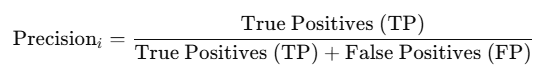

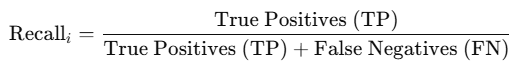

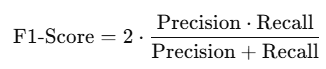

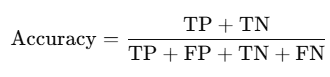

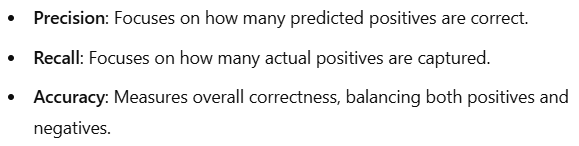

In [56]:
p = metrics.precision_score(true_labels,kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,kmeans_labels, average = None)
print(r)

[0.00662252 0.06629834 0.72619048]
[0.00598802 0.07185629 0.73493976]


Create a function that maps each cluster to the class that has the most points.

You need to be careful if many clusters map to the same class. It will not work in this case

Useful command: <tt>numpy.argmax</tt> returns the index of the max element

[[140  12  29]
 [  1 135  15]
 [ 26  20 122]]


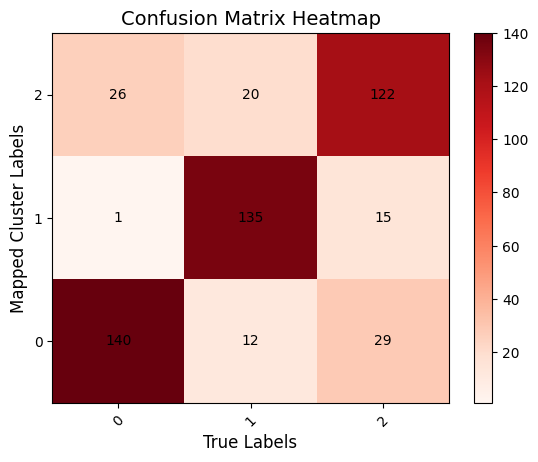

In [57]:
def cluster_class_mapping(kmeans_labels,true_labels):
    C= metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping = list(np.argmax(C,axis=1)) #for each row (cluster) find the best class in the confusion matrix
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

mapped_kmeans_labels,C = cluster_class_mapping(kmeans_labels,true_labels)
print(C)
plt.pcolormesh(C, cmap=plt.cm.Reds)

# Annotate the heatmap with cell values
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        plt.text(j + 0.5, i + 0.5, str(C[i, j]),
                 ha='center', va='center', color='black')

# Set axis labels
plt.xlabel("True Labels", fontsize=12)
plt.ylabel("Mapped Cluster Labels", fontsize=12)

# Add tick marks with labels
plt.xticks(np.arange(C.shape[1]) + 0.5, range(C.shape[1]), rotation=45)
plt.yticks(np.arange(C.shape[0]) + 0.5, range(C.shape[0]))

plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.colorbar()
plt.show()

Compute different metrics for clustering quality

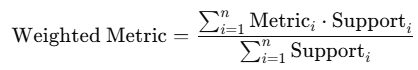

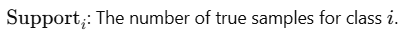

In [58]:
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = None)
print(r)
f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = None)
print(f)
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average='weighted')
print(p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print(r)
f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print(f)

[0.77348066 0.89403974 0.72619048]
[0.83832335 0.80838323 0.73493976]
[0.8045977  0.8490566  0.73053892]
0.7980470510548809
0.794
0.794859459999974


### Homogeneity and completeness

http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness

Homogeneity and completeness are computed using the conditional entropy of the labels given the cluster, and the conditional entropy of the cluster labels given the class label. The V-measure combines these in a similar way like F-measure

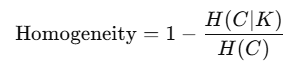

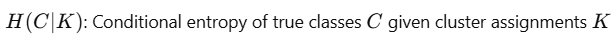

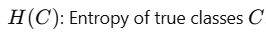

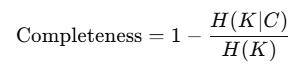

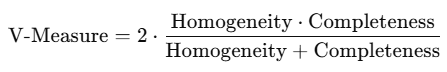

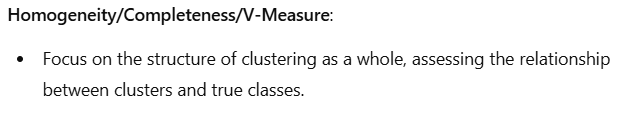

In [59]:
h = metrics.homogeneity_score(true_labels,mapped_kmeans_labels)
print(h)
c = metrics.completeness_score(true_labels,mapped_kmeans_labels)
print(c)
v = metrics.v_measure_score(true_labels,mapped_kmeans_labels)
print(v)

0.44199547480098583
0.4430951461741084
0.44254462735008065


### Silhouette score

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Create the silhouette plot, plotting the silhouette score against k

We see a peak at k = 3 and k = 6 indicating that these may be good values for the cluster number

The SSE plot

Text(0, 0.5, 'Error')

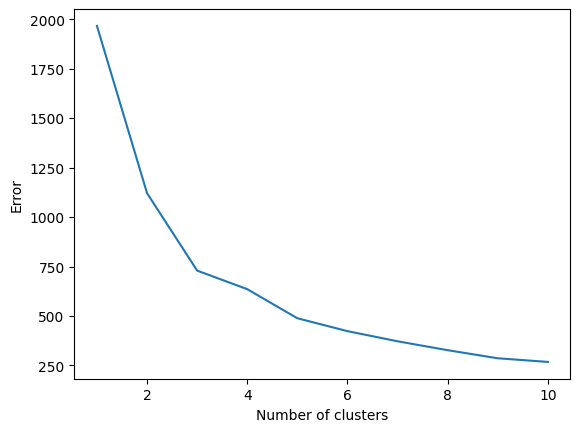

In [60]:
error = np.zeros(11)
sh_score = np.zeros(11)
for k in range(1,11):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(X, kmeans.labels_)

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

The silhouette plot

Text(0, 0.5, 'silhouette score')

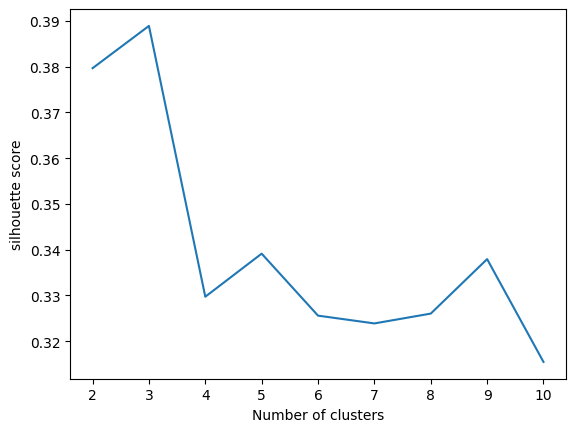

In [61]:
plt.plot(range(2,len(sh_score)),sh_score[2:])
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

Plot of silhouette and SSE together in a plot with two different y axes. The red (left) is the silhouette score and the blue (right) is the SSE score. We can now study the two lines together.

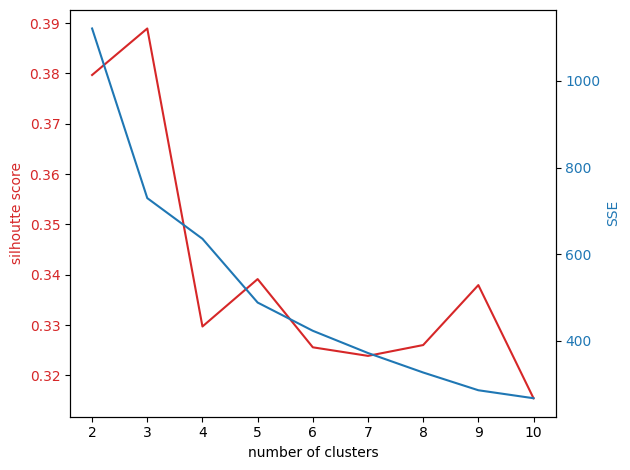

In [62]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhoutte score', color=color)
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SSE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,len(error)),error[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

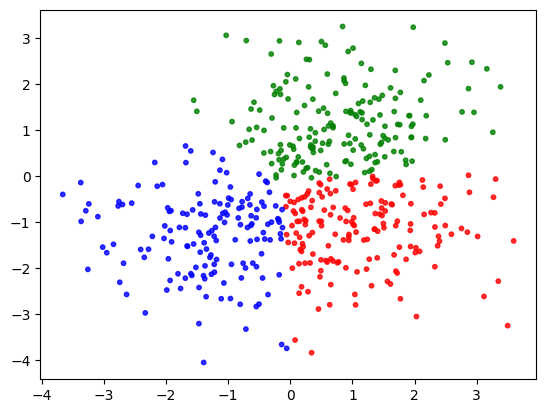

In [63]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[kmeans_labels].tolist(), s=10, alpha=0.8)

### Agglomerative Clustering

More on Agglomerative Clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

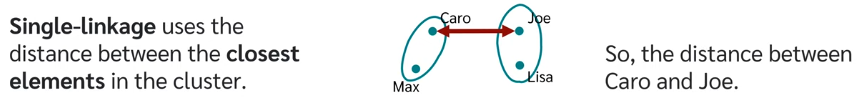

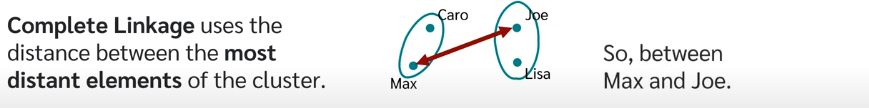



In [64]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
agglo_labels = agglo.fit_predict(X)

print("Confusion Matrix before label mapping:")
C_agglo = metrics.confusion_matrix(agglo_labels, true_labels)
print(C_agglo)
#plt.pcolor(C_agglo, cmap=plt.cm.coolwarm)
#plt.pcolormesh(C_agglo, cmap=plt.cm.Reds)

print("\nConfusion Matrix after label mapping:")
mapped_agglo_labels, C_agglo = cluster_class_mapping(agglo_labels, true_labels)
print(C_agglo)

print("\nPrecision score:")
p = metrics.precision_score(true_labels, mapped_agglo_labels, average='weighted')
print(p)

print("\nRecall score:")
r = metrics.recall_score(true_labels, mapped_agglo_labels, average='weighted')
print(r)

Confusion Matrix before label mapping:
[[ 33 156 108]
 [126  10  16]
 [  8   1  42]]

Confusion Matrix after label mapping:
[[126  10  16]
 [ 33 156 108]
 [  8   1  42]]

Precision score:
0.7257145291928573

Recall score:
0.648


Another way to do agglomerative clustering using SciPy:
    
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [65]:
import scipy.spatial.distance as sp_dist
D = sp_dist.pdist(X, 'euclidean')
Z = hr.linkage(D, method='complete')
print (Z.shape, X.shape)
print('\n')
print("Linkage Matrix (Z):")
print("Index of Cluster 1 | Index of Cluster 2 | Distance Between Clusters | Number of Points in New Cluster")
print(Z)

(499, 4) (500, 2)


Linkage Matrix (Z):
Index of Cluster 1 | Index of Cluster 2 | Distance Between Clusters | Number of Points in New Cluster
[[3.01000000e+02 4.12000000e+02 4.62482589e-03 2.00000000e+00]
 [1.41000000e+02 2.59000000e+02 9.35716392e-03 2.00000000e+00]
 [2.16000000e+02 4.22000000e+02 1.05873218e-02 2.00000000e+00]
 ...
 [9.91000000e+02 9.94000000e+02 5.60370001e+00 2.97000000e+02]
 [9.92000000e+02 9.96000000e+02 7.70360478e+00 3.48000000e+02]
 [9.95000000e+02 9.97000000e+02 8.02903447e+00 5.00000000e+02]]


Hierarchical clustering returns a 4 by (n-1) matrix Z. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

Visual way to find the optimal number of clusters from the Dendrogram: Look for the largest vertical distance that can be drawn without crossing a horizontal line. This represents the point at which merging should stop to achieve an optimal number of clusters.

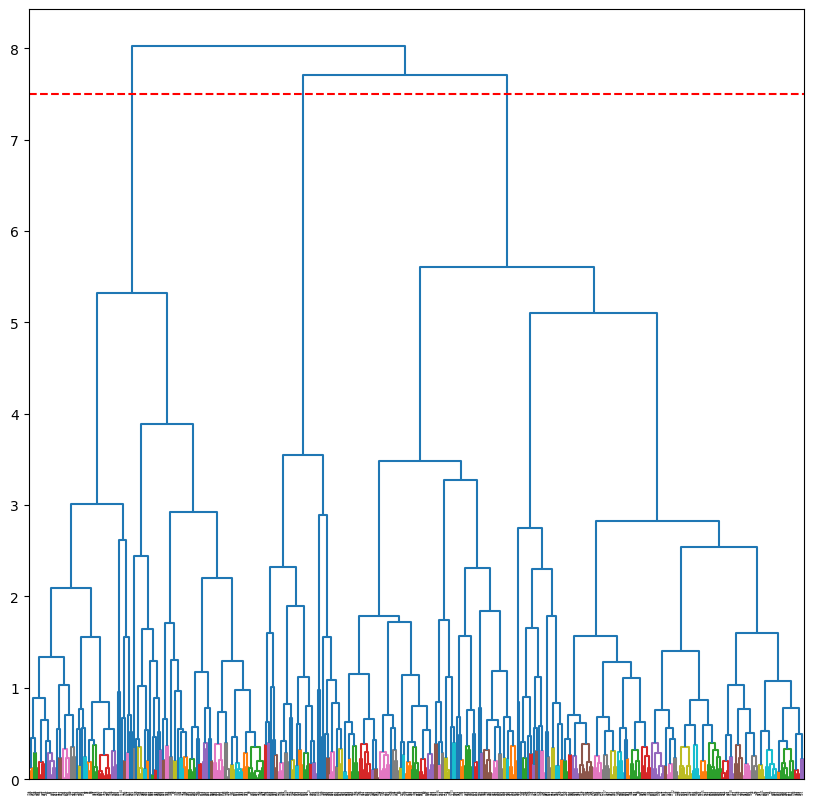

In [66]:
fig = plt.figure(figsize=(10,10))
T = hr.dendrogram(Z,color_threshold=0.4, leaf_font_size=2)
# Add a horizontal line to indicate the threshold for 3 clusters
plt.axhline(y=7.5, color='r', linestyle='--', label='Threshold for 3 Clusters')
fig.show()
# y-axis hight in dendrogram = Distance between clusters

Another way to do agglomerative clustering (and visualizing it):
http://seaborn.pydata.org/generated/seaborn.clustermap.html

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


[177, 469, 83, 179, 343, 61, 34, 124, 3, 466, 252, 490, 442, 312, 354, 230, 240, 476, 302, 57, 317, 154, 438, 167, 71, 472, 232, 399, 450, 35, 236, 454, 172, 478, 219, 107, 320, 455, 283, 434, 244, 426, 425, 121, 123, 25, 335, 432, 254, 6, 174, 127, 388, 423, 267, 53, 435, 257, 197, 209, 481, 415, 491, 264, 206, 294, 181, 411, 275, 12, 117, 208, 226, 187, 332, 444, 238, 274, 263, 310, 75, 355, 374, 4, 424, 465, 95, 114, 142, 309, 281, 129, 468, 471, 80, 250, 200, 266, 419, 235, 436, 383, 194, 462, 28, 160, 441, 301, 412, 40, 11, 173, 242, 380, 100, 350, 221, 330, 392, 410, 36, 499, 287, 394, 88, 31, 54, 43, 155, 182, 347, 20, 222, 295, 369, 32, 15, 188, 440, 326, 316, 447, 24, 82, 137, 92, 480, 168, 223, 431, 382, 484, 492, 52, 345, 363, 58, 300, 47, 78, 51, 387, 356, 145, 207, 346, 416, 62, 329, 37, 305, 98, 321, 153, 178, 247, 348, 306, 417, 112, 148, 163, 405, 367, 81, 255, 323, 304, 131, 313, 135, 218, 402, 120, 16, 482, 63, 205, 333, 474, 443, 231, 1, 403, 150, 108, 397, 45, 19, 3

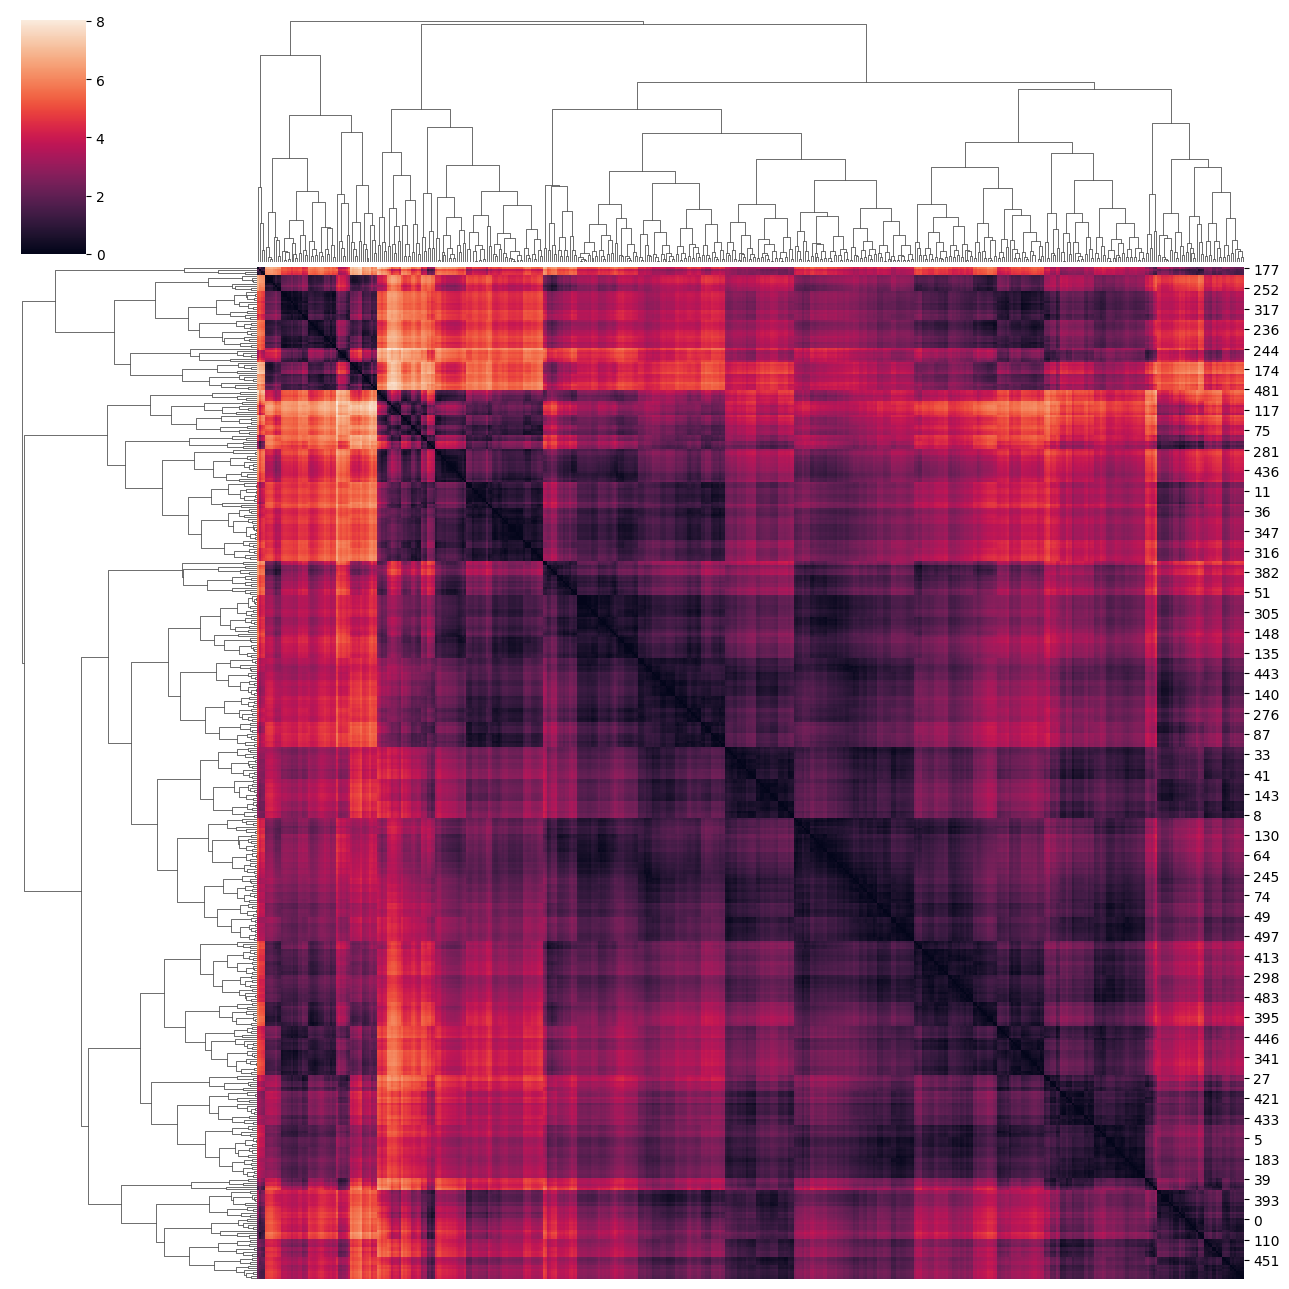

In [67]:
distances = metrics.euclidean_distances(X)
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False)
print (cg.dendrogram_col.reordered_ind)

### DBSCAN Algorithm ###

More on DBSCAN here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

  DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are closely packed, while marking points that lie alone as Noise (labeled as -1).

In [68]:
dbscan = sk_cluster.DBSCAN(eps=0.3)
dbscan_labels = dbscan.fit_predict(X)

print("DBSCAN Labels (Note: -1 corresponds to noise):")
print(dbscan_labels)

# Rename labels to avoid negative values for metrics
renamed_dbscan_labels = [x + 1 for x in dbscan_labels]

print("\nConfusion Matrix comparing DBSCAN labels with true labels:")
C = metrics.confusion_matrix(renamed_dbscan_labels, true_labels)
print(C[:, :max(true_labels) + 1])

# Calculating scores
print("\nPrecision Score (weighted):")
precision = metrics.precision_score(true_labels, renamed_dbscan_labels, average='weighted', zero_division=1)
print(precision)
print("\nRecall Score (weighted):")
recall = metrics.recall_score(true_labels, renamed_dbscan_labels, average='weighted', zero_division=1)
print(recall)
print("\nF1 Score (weighted):")
f1_score = metrics.f1_score(true_labels, renamed_dbscan_labels, average='weighted', zero_division=1)
print(f1_score)

DBSCAN Labels (Note: -1 corresponds to noise):
[ 5  0  0 -1 -1  0 -1  0  0  3  0  0 -1 -1  0 -1  0  0  0  0  0  0  5  0
  0 -1  0 -1 -1  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0 -1  1 -1  0  0  0  0  1  0  0 -1  0  0  0  0  0  0  0  0  0 -1
  0  0  0 -1  0  0 -1  0  2  0  0 -1  0  3  0  0  0 -1  0  0 -1  0  0 -1
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0
  0 -1  0 -1 -1  3  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  4  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0 -1  1  0  0  0 -1
 -1  3  0 -1 -1  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1 -1  0 -1  0
  0  0  0  0  0 -1  0  0  2  0  0 -1  0  0 -1  0 -1 -1 -1  0  0  0  0 -1
  0 -1  0  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  2  0  0 -1  0
  0  5  0  0 -1  0  0  0  0  0  2  0 -1  0 -1  0 -1 -1  0  0  0  0  0 -1
 -1  0  2 -1  0  0  0  5  0  0 -1 -1  0  0  0  0 -1 -1  0  0  0 -1  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0 -1  0  0  0  0  0 -1 -1  0
  0 

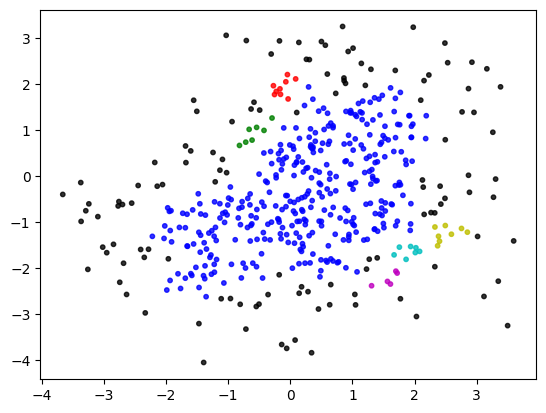

In [69]:
#colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colors = np.hstack([colors] * 20)
colors = np.array([x for x in 'bgrcmywk'*10])
plt.scatter(X[:, 0], X[:, 1], color=colors[dbscan_labels].tolist(), s=10, alpha=0.8)

A case where DBSCAN workds better

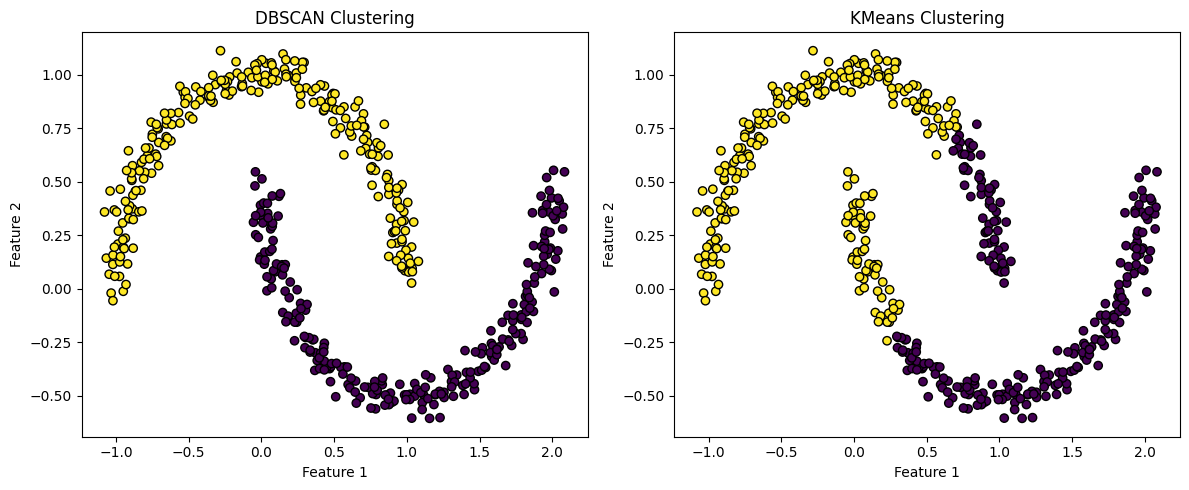

Adjusted Rand Index for DBSCAN: 1.0
Adjusted Rand Index for KMeans: 0.2525184244081995


In [70]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import adjusted_rand_score

# Create synthetic data with a non-convex shape
X, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plotting the results for DBSCAN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting the results for KMeans
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Evaluating the clustering performance using Adjusted Rand Index (ARI)
dbscan_ari = adjusted_rand_score(_, dbscan_labels)
kmeans_ari = adjusted_rand_score(_, kmeans_labels)

print("Adjusted Rand Index for DBSCAN:", dbscan_ari)
print("Adjusted Rand Index for KMeans:", kmeans_ari)


## Clustering text data

An example of what we want to do:
http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

SciKit datasets: http://scikit-learn.org/stable/datasets/

We will use the 20-newsgroups datasets which consists of postings on 20 different newsgroups.

More information here: http://scikit-learn.org/stable/datasets/#the-20-newsgroups-text-dataset


In [71]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
#categories = ['alt.atheism', 'sci.space','rec.sport.baseball']
news_data = sk_data.fetch_20newsgroups(subset='train',
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (news_data.target)
print (len(news_data.target))

[2 0 0 ... 2 1 2]
1781


In [72]:
print (type(news_data))
print (news_data.filenames)
print (news_data.target[:10])
print (news_data.data[1])
print (len(news_data.data))

<class 'sklearn.utils._bunch.Bunch'>
['/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60940'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.os.ms-windows.misc/9955'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.os.ms-windows.misc/9846'
 ...
 '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60891'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/rec.sport.baseball/104484'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61110']
[2 0 0 2 0 0 1 2 2 1]
Recently the following problem has arrisen.  The first time I turn on my  
computer when windows starts (from my autoexec) after the win31 title screen  
the computer reboots on its own.  Usually the second time (after reboot) or  
from the DOS prompt everything works fine.

 s far as I remember I have not changed my config.sys or autoxec.bat or  
win.ini.  I can't remember whether this problem occured before I  
optimized/defragmented my disk a

In [73]:
vectorizer = sk_text.TfidfVectorizer(stop_words='english',  # removes common words ("the", "is", "and", etc.)
                             #max_features = 1000,
                             min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data)
print(type(data))  # Sparce matrix of: 1781 rows by Vocabulary #words columns.

<class 'scipy.sparse._csr.csr_matrix'>


In [74]:
import sklearn.cluster as sk_cluster
k=3
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(data)

array([0, 1, 1, ..., 2, 0, 2], dtype=int32)

To understand the clusters we can print the words that have the highest values in the centroid

In [75]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 thanks
 like
 ax
 just
 edu
 mail
 does
 know
 jewish
 baseball
Cluster 1:
 windows
 file
 dos
 files
 use
 driver
 drivers
 thanks
 card
 problem
Cluster 2:
 space
 year
 think
 don
 just
 team
 good
 like
 nasa
 game


Applying all 3 Clustering Algorithms and printing Confusion Matrices and Scores

In [76]:
from sklearn.cluster import AgglomerativeClustering

# Apply KMeans to text data
k = 3
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(data)

# Apply DBSCAN to text data
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)

# Apply Agglomerative Clustering to text data
agglo = AgglomerativeClustering(n_clusters=k, linkage='complete')
agglo_labels = agglo.fit_predict(data.toarray())

# Scoring for KMeans
print("KMeans Clustering Confusion Matrix and Scores:")
C_kmeans = metrics.confusion_matrix(kmeans.labels_, news_data.target)
mapped_kmeans_labels, C_kmeans = cluster_class_mapping(kmeans.labels_, news_data.target)
print(C_kmeans)
p_kmeans = metrics.precision_score(news_data.target, mapped_kmeans_labels, average='weighted', zero_division=0)
print("Weighted Precision for KMeans:", p_kmeans)
r_kmeans = metrics.recall_score(news_data.target, mapped_kmeans_labels, average='weighted', zero_division=0)
print("Weighted Recall for KMeans:", r_kmeans)

# Scoring for DBSCAN
print("\nDBSCAN Clustering Confusion Matrix and Scores:")
renamed_dbscan_labels = [x + 1 for x in dbscan_labels]  # to avoid negative values for metrics
C_dbscan = metrics.confusion_matrix(renamed_dbscan_labels, news_data.target)
mapped_dbscan_labels, C_dbscan = cluster_class_mapping(renamed_dbscan_labels, news_data.target)
print(C_dbscan)
p_dbscan = metrics.precision_score(news_data.target, mapped_dbscan_labels, average='weighted', zero_division=0)
print("Weighted Precision for DBSCAN:", p_dbscan)
r_dbscan = metrics.recall_score(news_data.target, mapped_dbscan_labels, average='weighted', zero_division=0)
print("Weighted Recall for DBSCAN:", r_dbscan)

# Scoring for Agglomerative Clustering
print("\nAgglomerative Clustering Confusion Matrix and Scores:")
C_agglo = metrics.confusion_matrix(agglo_labels, news_data.target)
mapped_agglo_labels, C_agglo = cluster_class_mapping(agglo_labels, news_data.target)
print(C_agglo)
p_agglo = metrics.precision_score(news_data.target, mapped_agglo_labels, average='weighted', zero_division=0)
print("Weighted Precision for Agglomerative Clustering:", p_agglo)
r_agglo = metrics.recall_score(news_data.target, mapped_agglo_labels, average='weighted', zero_division=0)
print("Weighted Recall for Agglomerative Clustering:", r_agglo)

KMeans Clustering Confusion Matrix and Scores:
[[419  18  31]
 [172 579 562]
 [  0   0   0]]
Weighted Precision for KMeans: 0.4449094836058996
Weighted Recall for KMeans: 0.5603593486805165

DBSCAN Clustering Confusion Matrix and Scores:
[[  9   0   0]
 [ 26  30  17]
 [556 567 576]]
Weighted Precision for DBSCAN: 0.5824722503527254
Weighted Recall for DBSCAN: 0.34531162268388543

Agglomerative Clustering Confusion Matrix and Scores:
[[503 475 430]
 [  0   0   0]
 [ 88 122 163]]
Weighted Precision for Agglomerative Clustering: 0.26404873791865363
Weighted Recall for Agglomerative Clustering: 0.37394722066254915
